In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
omx = pd.read_csv('./datasets/omxhpi_20010306-20240514.tsv', sep="\t", decimal=",", thousands=".", parse_dates=["Päivämäärä"], date_format="%d%m%Y")
omx

,Päivämäärä,Viim.,Avoin,Korkea,Matala,Vol.,Muut.%
0,15.05.2024,10316.96,10391.52,10404.95,10302.40,"57,26M",-0.43%
1,14.05.2024,10361.32,10315.66,10424.18,10308.34,"63,23M",+0.51%
2,13.05.2024,10308.32,10285.33,10308.68,10252.30,"39,81M",+0.45%
3,10.05.2024,10262.37,10197.84,10295.29,10197.84,"50,86M",+1.50%
4,08.05.2024,10110.53,10122.73,10165.13,10071.96,"43,32M",-0.07%
...,...,...,...,...,...,...,...
5819,12.03.2001,7902.69,8411.32,8414.29,7831.33,"81,61M",-6.05%
5820,09.03.2001,8411.32,8545.12,8545.12,8342.54,"61,22M",-1.57%
5821,08.03.2001,8545.12,8871.51,8955.55,8545.12,"91,38M",-3.68%
5822,07.03.2001,8871.51,9040.30,9040.31,8615.46,"88,49M",-1.87%


In [3]:
omx2 = omx.copy()[::-1]
omx2 = omx2.set_index("Päivämäärä")
omx2 = omx2.dropna(axis=0)
print("NA dropped:", len(omx)-len(omx2))

omx2["Vol."] = omx2["Vol."].str.replace("M", "0000")\
                           .str.replace("B", "0000000")\
                           .str.replace(",","")\
                           .astype(int)
                                
#omx2["Muut.%"] = omx2["Muut.%"].str.strip("%").astype(float)
omx2 = omx2.drop(columns="Muut.%")

omx2

NA dropped: 6


,Viim.,Avoin,Korkea,Matala,Vol.
Päivämäärä,,,,,
06.03.2001,9040.30,8713.75,9131.66,8713.75,90870000
07.03.2001,8871.51,9040.30,9040.31,8615.46,88490000
08.03.2001,8545.12,8871.51,8955.55,8545.12,91380000
09.03.2001,8411.32,8545.12,8545.12,8342.54,61220000
12.03.2001,7902.69,8411.32,8414.29,7831.33,81610000
...,...,...,...,...,...
08.05.2024,10110.53,10122.73,10165.13,10071.96,43320000
10.05.2024,10262.37,10197.84,10295.29,10197.84,50860000
13.05.2024,10308.32,10285.33,10308.68,10252.30,39810000


In [4]:
omx2.dtypes

Viim.     float64
Avoin     float64
Korkea    float64
Matala    float64
Vol.        int64
dtype: object

array([<AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>], dtype=object)

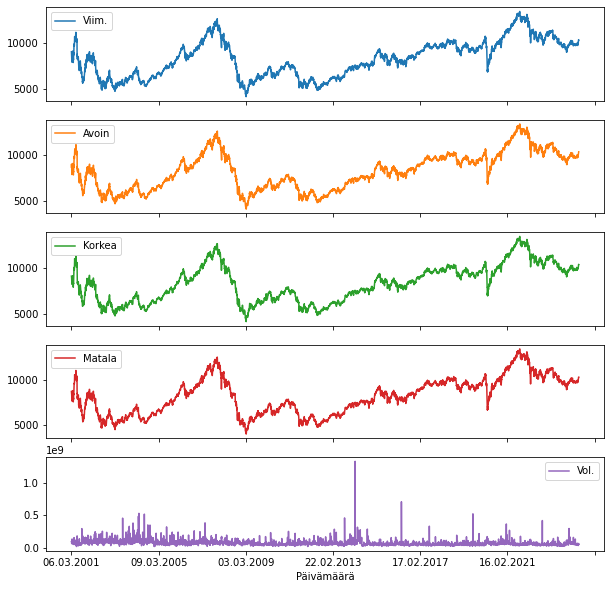

In [5]:
omx2.plot(subplots=True, figsize=(10,10))

In [6]:
omx2.to_csv('./datasets/preprocessed/omxhpi_20010306-20240515_daily.csv', index=False)

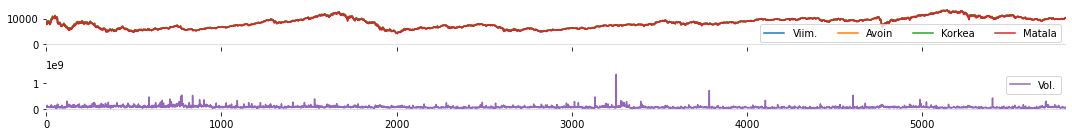

In [7]:
from datasets.plots import plot_datasets2
plot_datasets2(omx2, [(range(4)), (4,)])
plt.savefig(f"datasets/plots/omx.png", dpi=300)